### [OpenAQ REST API](https://api.openaq.org/)

Napisz program w Pythonie, który pobierze dane na temat jakości powietrza we wskazanym mieście z publicznego API "OpenAQ REST API" i wyświetli informacje na temat stężenia [pyłów pm2.5](https://pl.wikipedia.org/wiki/PM2,5)  na wykresie.

#### Pobranie danych  o powietrzu w danym mieście

In [3]:
import requests

city = "Warszawa"

# URL do API OpenAQ
url = f"https://api.openaq.org/v2/measurements?city={city}&parameter=pm25&limit=100"
    
# Wysłanie żądania GET do API
response = requests.get(url)
    
# Sprawdzenie statusu odpowiedzi
if response.status_code == 200:
    # Parsowanie danych JSON
    data = response.json()
    result = data['results']
else:
    result = None
    print(f"Błąd: Nie udało się pobrać danych (status code: {response.status_code})")


print(result)

[{'locationId': 7245, 'location': 'Warszawa, ul. Kondratowicza', 'parameter': 'pm25', 'value': 10.2, 'date': {'utc': '2024-06-07T22:00:00+00:00', 'local': '2024-06-08T00:00:00+02:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 52.290863999390986, 'longitude': 21.04245800001037}, 'country': 'PL', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 7245, 'location': 'Warszawa, ul. Kondratowicza', 'parameter': 'pm25', 'value': 9.6, 'date': {'utc': '2024-06-07T21:00:00+00:00', 'local': '2024-06-07T23:00:00+02:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 52.290863999390986, 'longitude': 21.04245800001037}, 'country': 'PL', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 7245, 'location': 'Warszawa, ul. Kondratowicza', 'parameter': 'pm25', 'value': 9.9, 'date': {'utc': '2024-06-07T20:00:00+00:00', 'local

#### Analiza i wizualizacja danych

In [5]:
print(result[0])

{'locationId': 7245, 'location': 'Warszawa, ul. Kondratowicza', 'parameter': 'pm25', 'value': 10.2, 'date': {'utc': '2024-06-07T22:00:00+00:00', 'local': '2024-06-08T00:00:00+02:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 52.290863999390986, 'longitude': 21.04245800001037}, 'country': 'PL', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}


In [7]:
print(result[1])

{'locationId': 7245, 'location': 'Warszawa, ul. Kondratowicza', 'parameter': 'pm25', 'value': 9.6, 'date': {'utc': '2024-06-07T21:00:00+00:00', 'local': '2024-06-07T23:00:00+02:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 52.290863999390986, 'longitude': 21.04245800001037}, 'country': 'PL', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}


Średni poziom PM2.5: 9.79 µg/m³


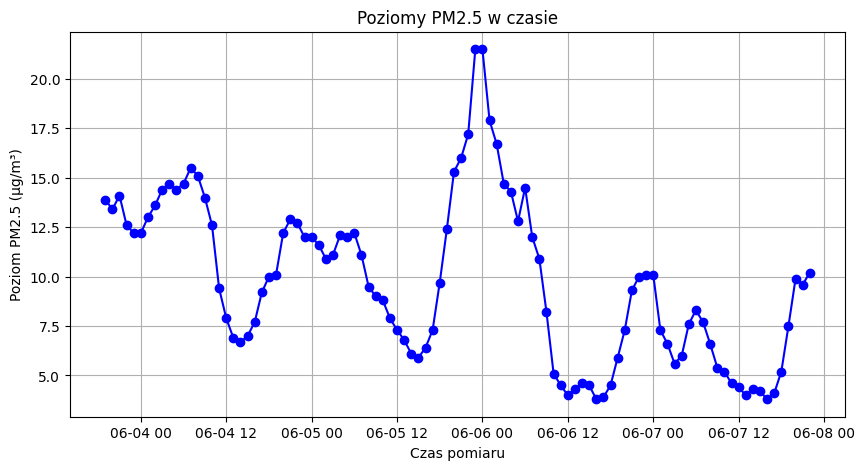

In [10]:
import matplotlib.pyplot as plt
import datetime


# Wyciągnięcie poziomów PM2.5 i czasu pomiaru
pm25_levels = [entry['value'] for entry in result]
measurement_dt = [datetime.datetime.strptime(entry['date']['utc'], '%Y-%m-%dT%H:%M:%S%z') for entry in result]

# Obliczenie średniego poziomu PM2.5
average_pm25_level = sum(pm25_levels) / len(pm25_levels)

# Wyświetlenie średniego poziomu PM2.5
print(f"Średni poziom PM2.5: {average_pm25_level:.2f} µg/m³")

# Wizualizacja poziomów PM2.5
plt.figure(figsize=(10, 5))
plt.plot(measurement_dt, pm25_levels, marker='o', linestyle='-', color='b')
plt.xlabel('Czas pomiaru')
plt.ylabel('Poziom PM2.5 (µg/m³)')
plt.title('Poziomy PM2.5 w czasie')
plt.grid(True)
plt.show()